# Exercice 1

## Question 1

In [1]:
import math
import numpy as np
import scipy.stats as scs 
import matplotlib.pyplot as plt 
import numpy.random as random

width = 0.1

In [2]:
def simuleDeClassique():
    return math.floor(6*random.rand()+1)

[simuleDeClassique() for i in range(20)]

[1, 3, 6, 5, 2, 4, 3, 4, 1, 2, 2, 5, 6, 5, 2, 5, 5, 3, 1, 1]

## Question 2

La somme $S$ de deux variables uniformes independantes $X,Y$ sur $\{1,\dots,6\}$ prend ses valeurs dans $\{2,\dots,12\}$ et si $2\leqslant k\leqslant 7$:
$$P(S=k)=\sum_{i=1}^{k-1}P(X=i)P(Y=k-i)=\frac{k-1}{36}$$
si $7\leqslant k\leqslant 12$:
$$P(S=k)=\sum_{i=k-6}^{6}P(X=i)P(Y=k-i)=\frac{12+1-k}{36}$$



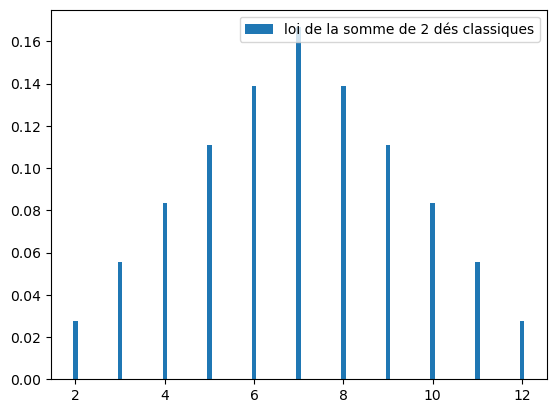

In [3]:
def loiSomme():
    loi = [(k-1)/36 for k in range(2,8)] + [(13-k)/36 for k in range(8,13)]
    plt.bar(range(2,13),loi,width=width,label="loi de la somme de 2 dés classiques")

plt.figure()
loiSomme()
plt.legend()
plt.show()

## Question 3

In [4]:
def simuleDe(faces):
    return faces[math.floor(6*random.rand())]

facesA = [1, 2, 2, 3, 3 ,4]
facesB = [1, 3, 4, 5, 6, 8]

print([simuleDe(facesA) for i in range(20)])
print([simuleDe(facesB) for i in range(20)])

[3, 3, 3, 2, 3, 1, 4, 3, 4, 2, 1, 2, 4, 3, 3, 3, 3, 4, 3, 4]
[3, 4, 3, 6, 8, 5, 1, 4, 8, 4, 3, 4, 8, 5, 4, 5, 5, 3, 6, 8]


## Question 4

In [7]:
valeursDeZ = range(2,13)

def simuleZ():
    return simuleDe(facesA)+simuleDe(facesB)
[simuleZ() for i in range(20)]


def sommeEmpiriqueSicherman(N):
    card = np.zeros(11)
    for i in range(N):
        card[simuleZ()-2] += 1
    plt.bar(np.arange(2,13)+width,card/N,width=width,label=f'empirique N = {N}')

    

## Question 5

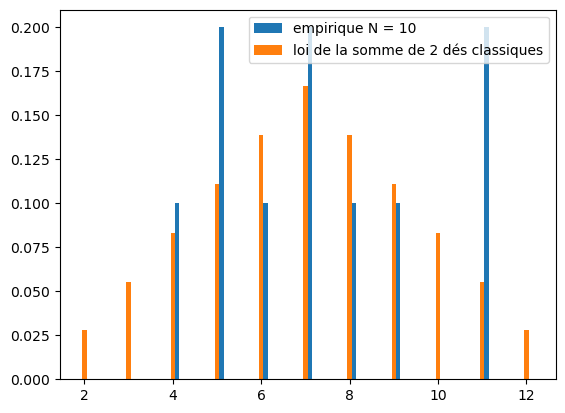

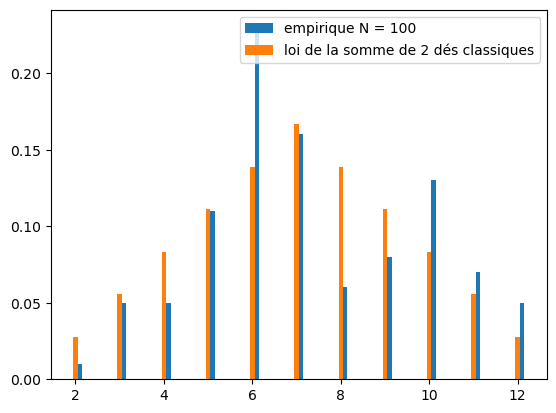

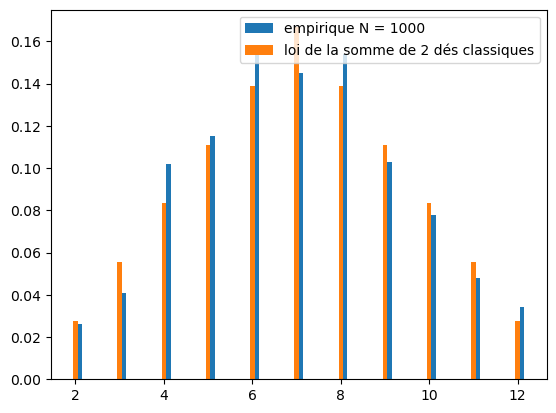

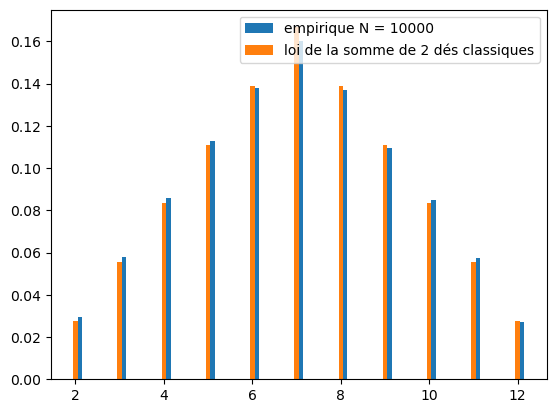

In [8]:
for j in range(1,5):
    plt.figure()
    sommeEmpiriqueSicherman(10**j)
    loiSomme()
    plt.legend()
    plt.show()


# Exercice 2

## Question 1
Pour que $N_1=k+1$, il faut que les $k$ premiers essais $X_1,\ldots,X_k$ valent $0$, ce qui a probabilité $(1-p)^k$, puis que $X_{k+1}=1$, ce qui a probabilité $p$. Donc, par indépendance de ces variables,
$$ \mathbb{P}[N_1=k+1] = (1-p)^k\,p.$$
C'est la loi géométrique de paramètre $p$.

## Question 2

L'indice du $r$-ième succès est n'importe quel entier plus grand que $r$, donc s'écrit sous la forme $k+r$ pour un certain $k \geq 0$. Si $N_r = k+r$ pour $r \geq 2$, alors le $r-1$ succès a eu lieu avant, en un indice compris entre $r-1$ et $k+r-1$. Supposons donc $N_{r-1} = i+r-1$ avec $0 \leq i \leq k$. Alors, pour que $N_r=k+r$, il faut que les variables $X_n$ avec $i+r-1<n<k+r$ donnent des échecs, ce qui a probabilité $(1-p)^{k-i}$, et que la variable $X_{k+r}$ vaille $1$, ce qui a probabilité $p$. On a donc :
\begin{align*}
\mathbb{P}[N_r = k+r] &= \sum_{i=0}^k \mathbb{P}[N_{r-1} = i+r-1 \text{ et } N_r = k+r]\\
&=\sum_{i=0}^k \mathbb{P}[N_{r-1} = i+r-1]\,(1-p)^{k-i}\,p\\
&= \sum_{i=0}^k \mathbb{P}[N_{r-1} = i+r-1]\,\mathbb{P}[N_1 = k-i+1].
\end{align*}


## Question 3

Si $r=2$, on obtient :

$$\mathbb{P}[N_2 = k+2] = \sum_{i=0}^k (1-p)^{i}\,p \, (1-p)^{k-i} \,p = (1-p)^k\,p^2 \left(\sum_{i=0}^k 1 \right)= (k+1)\,(1-p)^k\,p^2.$$

## Question 4

In [9]:
import math
import numpy as np
import scipy.stats as scs 
import matplotlib.pyplot as plt 
import numpy.random as random

def BN2_theorique(p, m, with_final_drawing=True):
    L = [(k+1) * (1-p)**k * p**2 for k in range(m+1)]
    fig = plt.figure(figsize=(10,10))
    plt.bar(range(2, m+3), L, width=-0.2, color="blue", align="edge")
    if with_final_drawing:
        plt.xlabel("$k$")
        plt.ylabel("$P[N_2]=k$")
        plt.title("Histogramme de la variable $N_2$")
        plt.xlim([1,m+3])
        plt.xticks(range(2, m+3))
        plt.show()

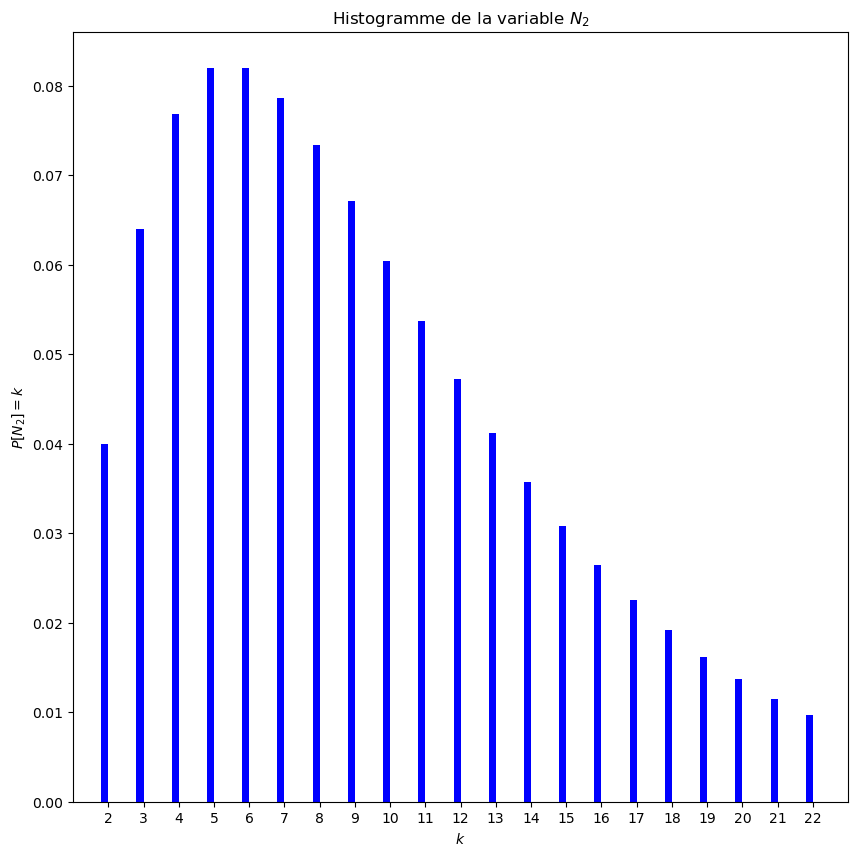

In [10]:
BN2_theorique(0.2, 20)

## Question 5

In [11]:
def BN2_empirique(p, m, M, with_final_drawing=True):
    alea = np.zeros(M)
    for i in range(M):
        count = 0
        n = 0
        while count < 2:
            n += 1
            if (random.random()<p):
                count += 1
        alea[i] = n
    frequences = [np.count_nonzero(alea == k)/M for k in range(2, m+3)]
    if with_final_drawing:
        fig = plt.figure(figsize=(10,10))
    plt.bar(range(2, m+3), frequences, width=0.2, color="red", align="edge")
    if with_final_drawing:
        plt.xlabel("$k$")
        plt.ylabel("Fréquences")
        plt.title(f"Histogramme empirique de la variable $N_2$ sur ${M}$ simulations")
        plt.xlim([1,m+3])
        plt.xticks(range(2, m+3))
        plt.show()

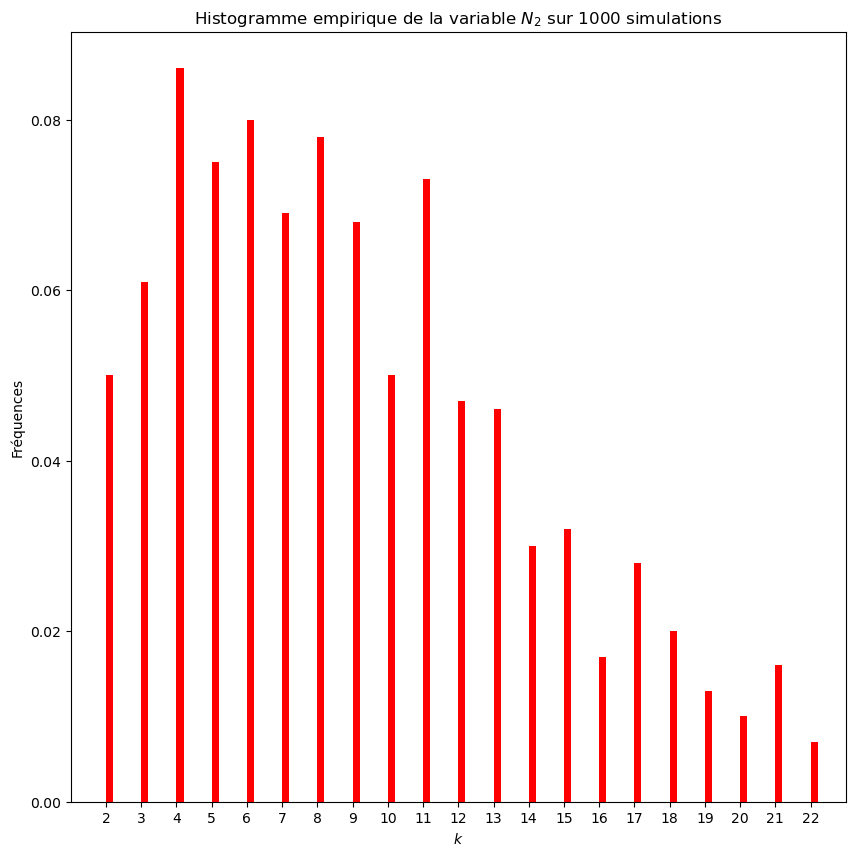

In [12]:
BN2_empirique(0.2, 20, 1000)

## Question 6

<Figure size 1000x1000 with 0 Axes>

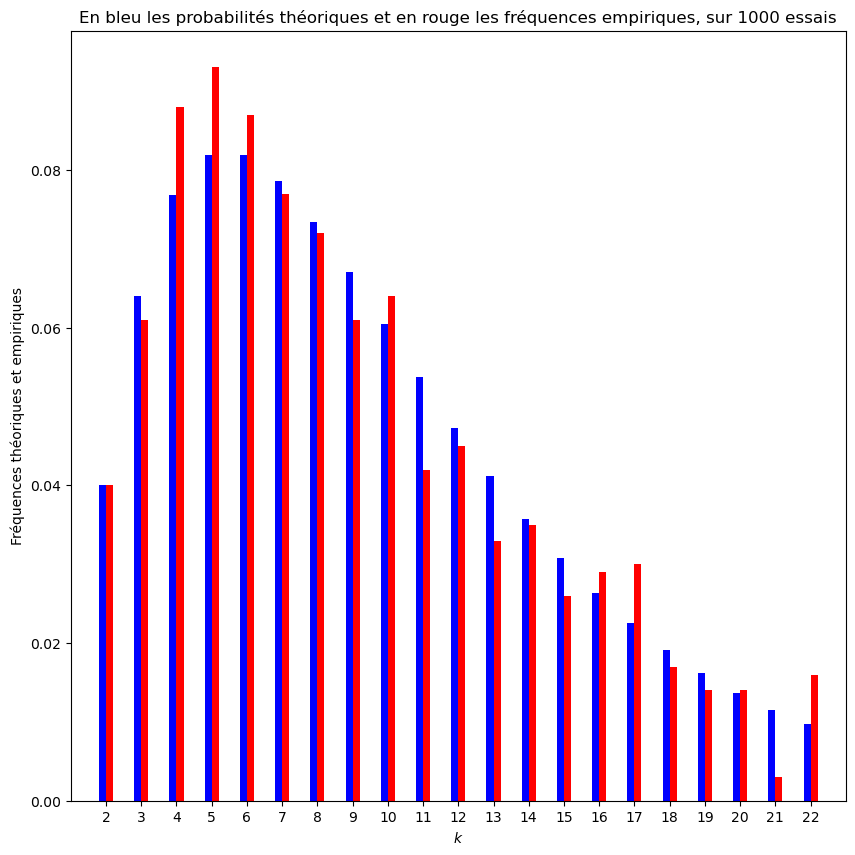

In [13]:
fig = plt.figure(figsize=(10,10))
p,m = 0.2,20
BN2_theorique(p, m, False)
BN2_empirique(p, m, 1000, False)
plt.xlabel("$k$")
plt.ylabel("Fréquences théoriques et empiriques")
plt.title(f"En bleu les probabilités théoriques et en rouge les fréquences empiriques, sur 1000 essais")
plt.xlim([1,m+3])
plt.xticks(range(2, m+3))
plt.show()

<Figure size 1000x1000 with 0 Axes>

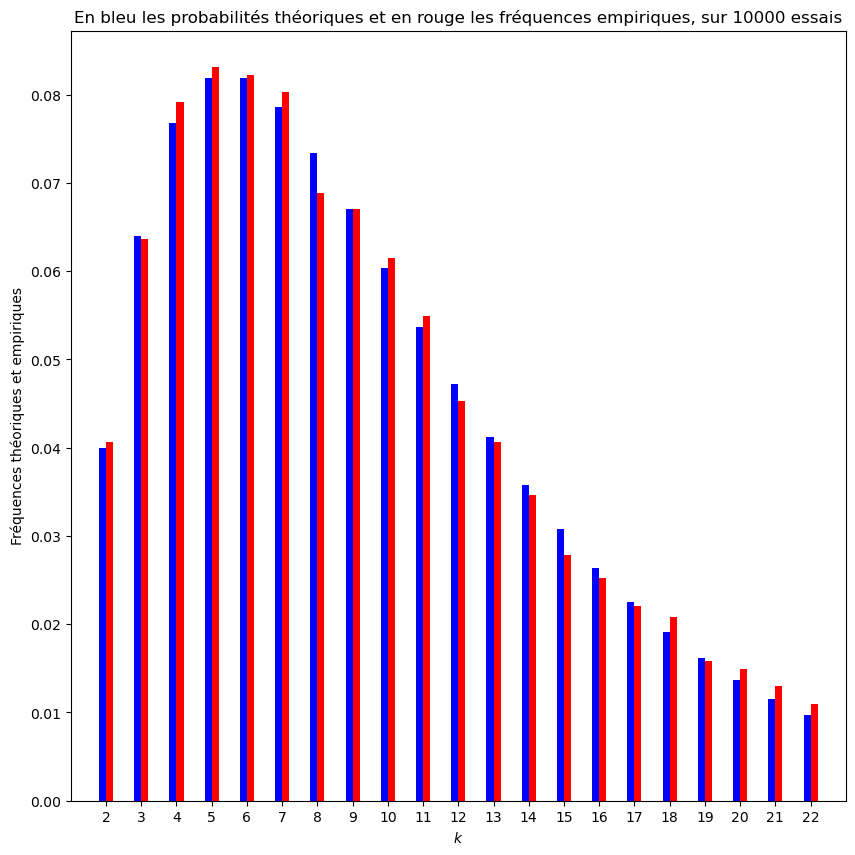

In [14]:
fig = plt.figure(figsize=(10,10))
p,m = 0.2,20
BN2_theorique(p, m, False)
BN2_empirique(p, m, 10000, False)
plt.xlabel("$k$")
plt.ylabel("Fréquences théoriques et empiriques")
plt.title(f"En bleu les probabilités théoriques et en rouge les fréquences empiriques, sur 10000 essais")
plt.xlim([1,m+3])
plt.xticks(range(2, m+3))
plt.show()

Les fréquences empiriques s'approchent de la loi discrète, de mieux en mieux lorsque le nombre de simulations tend vers l'infini.

## Question 7

En dérivant la formule pour la somme des puissances, on obtient :
$$\sum_{k=0}^m (k+1)\,z^k = \frac{1-(m+2)\,z^{m+1}}{1-z} + \frac{z-z^{m+2}}{(1-z)^2} = \frac{1-(m+2)\,z^{m+1} + (m+1)\,z^{m+2}}{(1-z)^2}.$$
On utilise cette formule avec $z=1-p$, et en remultipliant par $p^2$ pour obtenir :
$$\mathbb{P}[N_2 \leq m+2] = \sum_{k=0}^m \mathbb{P}[N_2=k+2] = p^2\sum_{k=0}^m (k+1)\,(1-p)^k = 1-(m+2)\,(1-p)^{m+1} + (m+1)\,(1-p)^{m+2}.$$